<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week5featureeng/d4_Dataenh/HeartAttacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from sklearn.pipeline import Pipeline    # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report        # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl
import missingno as m
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
#from catboost              import CatBoostClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = ("/content")

In [3]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content. Or use the environment method.


In [4]:
df = pd.read_csv("heart.csv")
#df_sat = pd.read_csv("o2Saturation.csv")
df.head()#output is the target value

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_sp = df.copy()

In [85]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

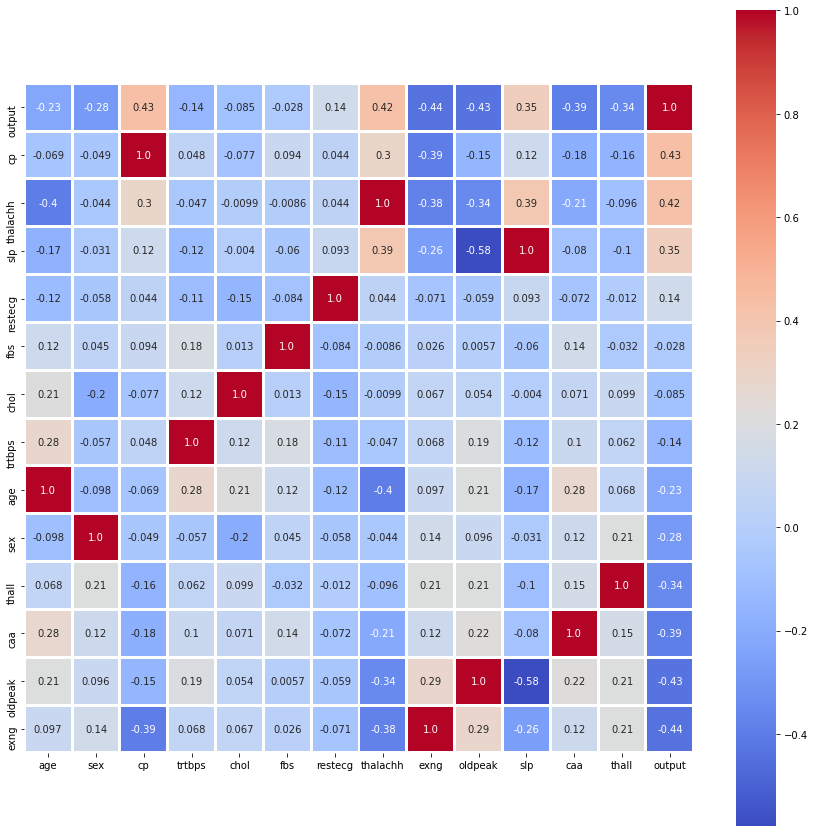

In [8]:
corr = df_sp.corr().sort_values(ascending = False, by = "output")
plt.figure(figsize=(15, 15))
sns.heatmap(corr,annot=True,fmt=".2",cmap= 'coolwarm',linewidths=2,square = True)#it is hard to say that some data correlated with each.
#output has weak corr withchol trtbps and fbs maybe we can cncat or combine them to get stronger something

In [ ]:
#sns.barplot(x='AloneOrNot', y='output', data=df)#it can be clearly seen that if u came Titanic Alone u will Die Alone

In [ ]:
#sns.pairplot(df_sp, hue="output")# we should normalize some of the numerical variables it should give us better results

In [77]:
X = df_sp.iloc[:,:-1]  
y = df_sp.iloc[:,-1]

Feature: 0, Score: 0.063
Feature: 1, Score: 0.022
Feature: 2, Score: 0.266
Feature: 3, Score: 0.053
Feature: 4, Score: 0.113
Feature: 5, Score: 0.000
Feature: 6, Score: 0.025
Feature: 7, Score: 0.043
Feature: 8, Score: 0.020
Feature: 9, Score: 0.105
Feature: 10, Score: 0.037
Feature: 11, Score: 0.139
Feature: 12, Score: 0.113


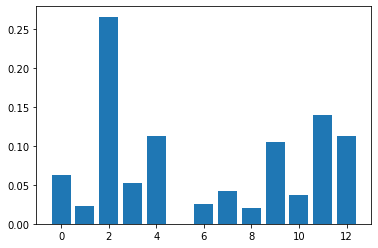

In [81]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

[08:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.02519
Feature: 1, Score: 0.06522
Feature: 2, Score: 0.29600
Feature: 3, Score: 0.02474
Feature: 4, Score: 0.02107
Feature: 5, Score: 0.00732
Feature: 6, Score: 0.02885
Feature: 7, Score: 0.02367
Feature: 8, Score: 0.08122
Feature: 9, Score: 0.05342
Feature: 10, Score: 0.10411
Feature: 11, Score: 0.11999
Feature: 12, Score: 0.14919


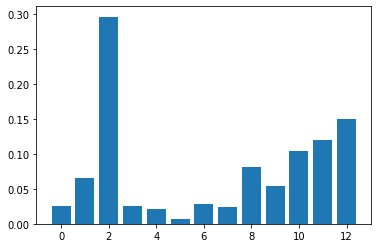

In [82]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor
# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [79]:
bestf = SelectKBest(score_func=chi2, k=10)
fit = bestf.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(12,'Score')) 

       Specs       Score
7   thalachh  188.320472
9    oldpeak   72.644253
11       caa   66.440765
2         cp   62.598098
8       exng   38.914377
4       chol   23.936394
0        age   23.286624
3     trtbps   14.823925
10       slp    9.804095
1        sex    7.576835
12     thall    5.791853
6    restecg    2.978271


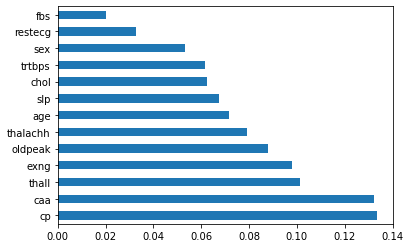

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
modell = ExtraTreesClassifier()
modell.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

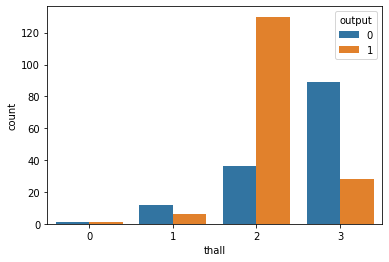

In [83]:
sns.countplot(data= df_sp, x='thall',hue='output')#thall 2 means high chance of heart attack

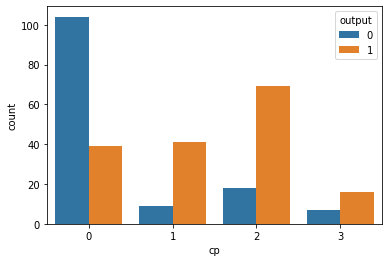

In [86]:
sns.countplot(data= df_sp, x='cp',hue='output')

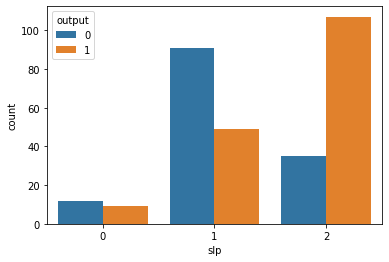

In [13]:
sns.countplot(data= df_sp, x='slp',hue='output')#slp 2 also hihgh chane of heart attack

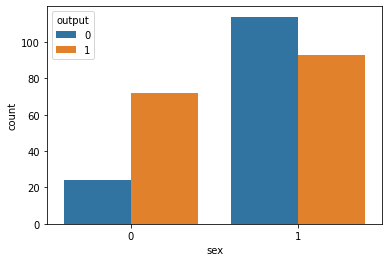

In [14]:
sns.countplot(data= df_sp, x='sex',hue='output')#interesting for 0 sex chol trigger heart attack but we can not say that for sex 1

In [68]:
cat_vars  = ['Sex', 'cp', 'fbs','restecg','slp','caa','exng','thall']         # x.select_dtypes(include=[object]).columns.values.tolist()
num_vars  = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'] 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
"""#cat_4_multModels = pipeline.Pipeline(steps=[('onehotencoder' , OneHotEncoder())
#])


num_4_multmodels=Pipeline(steps=[('scaler',StandardScaler())

    ])
tree_prepro = compose.ColumnTransformer(transformers=[
     ("num mult",num_4_multmodels,num_vars)
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_prepro"""

In [ ]:
"""from sklearn.pipeline import *
mult_classifiers={
    "SVM": svm.SVC(),
    "Logistic": LogisticRegression(),
    "KNN":KNeighborsClassifier(n_neighbors=3),
    "MLP":MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
    "RDF":RandomForestClassifier(random_state=42),
    "GBM": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    "LGBM":LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100),
    "XGBoost": XGBClassifier(),
    }

mult_classifiers = {name: make_pipeline(tree_prepro, model) for name, model in mult_classifiers.items()}

mult_classifiers["SVM"]"""

In [60]:
"""from sklearn import metrics 
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})
x_train, x_val, y_train, y_val = model_selection.train_test_split(X,y, test_size=0.2,stratify = y, random_state=4)
for model_name, model in mult_classifiers.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    model.fit(x_train,y_train)
    # GET PREDICTIONS USING x_val
    pred = model.predict(x_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')"""

,Model,Accuracy,Bal Acc.,Time
1,SVM,80.327869,79.653680,0.017215
2,MLP,80.327869,80.735931,0.131189
3,Logistic,78.688525,78.409091,0.011431
4,GBM,78.688525,77.867965,0.070539
5,XGBoost,77.049180,76.352814,0.031766
6,RDF,73.770492,73.593074,0.210736
7,LGBM,73.770492,73.322511,0.029492
8,KNN,65.573770,65.205628,0.012011


In [70]:
pipe_LogReg = Pipeline([('scaler',StandardScaler()),
                        ('LogisticRegression',LogisticRegression())])

pipe_knn = Pipeline([('scaler',StandardScaler()),
                        ('KNeighborsClassifier',KNeighborsClassifier())])

pipe_GBM = Pipeline([('scaler',StandardScaler()),
                        ("GBM", GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),)])

pipe_RForest = Pipeline([('scaler',StandardScaler()),
                  ('RandomForestClassifier',RandomForestClassifier())])


pipe_Ada = Pipeline([('scaler',StandardScaler()),
                  ('AdaBoostClassifier',AdaBoostClassifier())])

In [71]:
pipelines = [pipe_LogReg ,pipe_knn,pipe_GBM,pipe_RForest,pipe_Ada]

In [72]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [73]:
model_name =[]
scores=[]

for i,model in enumerate(pipelines):
    pred = model.predict(X_test)
    score = accuracy_score(y_test,pred)
    model_name.append(model.steps[1][0])
    scores.append(score)
    print(i,model.steps[1][0].upper(),':',score)
    print('\n')

0 LOGISTICREGRESSION : 0.8688524590163934


1 KNEIGHBORSCLASSIFIER : 0.819672131147541


2 GBM : 0.8524590163934426


3 RANDOMFORESTCLASSIFIER : 0.8852459016393442


4 ADABOOSTCLASSIFIER : 0.8852459016393442




In [74]:
confusion_matrix(y_test, pred2)

array([[25,  7],
       [ 0, 29]])

In [95]:
#add CLI
import argparse


In [96]:
parser = argparse.ArgumentParser()
parser.add_argument('--op', help='Provide the operation to perform')
parser.add_argument('--v', help='Input the values')
args = parser.parse_args()
a = 4
b = int(args.b)

# Parse the argument and perform the operation:
if args.op == 'add':
	print(f"{a} + {b} is {a+b}")
elif args.op == 'sub':
	print(f"{a} - {b} is {a-b}")
else:
  print("Invalid operation")

usage: ipykernel_launcher.py [-h] [--op OP] [--v V]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-b738f96c-da56-4827-afd4-fed0f1bafb6c.json


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
